<a href="https://colab.research.google.com/github/toolbassy/alser/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [95]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
data = pd.read_csv('/content/drive/MyDrive/alser.csv', sep = ';')
data = data.drop(['number'], axis=1)

In [98]:
data.head(247)

,name,brand,price,numberofsim,diagonal,width,length,screentechnology,os,numberofcore,memoryGB,sensortype
0,"Xiaomi 11T 8/128GB, Meteorite Gray",Xiaomi,259990,2,6.67,2400,1080,AMOLED,Android 11,8,128,акселерометр
1,"Vivo Y53S (128GB), Deep Sea Blue",Vivo,134990,2,6.58,2408,1080,IPS,Funtouch ОS 11.1,8,128,gps
2,"Vivo Y53S (128GB), Fantastic Rainbow",Vivo,134990,2,6.58,2408,1080,IPS,Funtouch ОS 11.1,8,128,gps
3,"Samsung Galaxy Z Flip 3 (new) 128GB, beige",Samsung,549890,2,6.70,2640,1080,Dynamic AMOLED 2X,Android 11,8,128,gps
4,"Samsung Galaxy Z Flip 3 (new)128GB, green",Samsung,549890,2,6.70,2640,1080,Dynamic AMOLED 2X,Android 11,8,128,gps
...,...,...,...,...,...,...,...,...,...,...,...,...
242,"Samsung Galaxy A51 128GB, Black (SM-A515FZKWSKZ)",Samsung,149890,2,6.50,2400,1080,Super AMOLED,Android,8,128,gps
243,"Samsung Galaxy A51 128GB, Blue (SM-A515FZBWSKZ)",Samsung,149890,2,6.50,2400,1080,Super AMOLED,Android,8,128,gps
244,"Samsung Galaxy A51 64GB, White (SM-A515FZWUSKZ)",Samsung,129890,2,6.50,2400,1080,Super AMOLED,Android,8,64,gps
245,"Samsung Galaxy A51 64GB, Black (SM-A515FZKUSKZ)",Samsung,0,2,6.50,2400,1080,Super AMOLED,Android,8,64,gps


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              247 non-null    object 
 1   brand             247 non-null    object 
 2   price             247 non-null    int64  
 3   numberofsim       247 non-null    int64  
 4   diagonal          247 non-null    float64
 5   width             247 non-null    int64  
 6   length            247 non-null    int64  
 7   screentechnology  247 non-null    object 
 8   os                247 non-null    object 
 9   numberofcore      247 non-null    int64  
 10  memoryGB          247 non-null    int64  
 11  sensortype        247 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 23.3+ KB


In [100]:
data.sensortype.unique()

array(['акселерометр', 'gps', 'гироскоп', 'Face ID', ' акселерометр',
       'освещения', 'отпечатков пальцев'], dtype=object)

In [101]:
data.brand.unique()

array(['Xiaomi', 'Vivo', 'Samsung', 'BQ-6645L', 'BQ', 'BQ-5016G', 'Apple',
       'OPPO', 'Realme', 'Galaxy', 'Nokia', 'Oppo', 'X-AGE', 'BQ-5740G',
       'BQ-5519G', 'BQ-6042L'], dtype=object)

In [102]:
data['sensortype'] = data['sensortype'].replace(['акселерометр'],'accelerometer')
data['sensortype'] = data['sensortype'].replace(['гироскоп'],'gyroscope')
data['sensortype'] = data['sensortype'].replace(['освещения'],'lighting')
data['sensortype'] = data['sensortype'].replace(['отпечатков пальцев'],'fingerprint')
data.sensortype.unique()

array(['accelerometer', 'gps', 'gyroscope', 'Face ID', ' акселерометр',
       'lighting', 'fingerprint'], dtype=object)

In [103]:
data['ostype'] = data['os'].str.split().str[0]
data['ostype'] = data['ostype'].replace(['Собственная'],'Own')
data['brand'] = data['brand'].replace(['Galaxy'],'Samsung')
data['brand'] = data['brand'].str.split('-').str[0]
data['brand'] = data['brand'].replace(['X'],'X-AGE')

data.brand.unique()

array(['Xiaomi', 'Vivo', 'Samsung', 'BQ', 'Apple', 'OPPO', 'Realme',
       'Nokia', 'Oppo', 'X-AGE'], dtype=object)

In [104]:
data.head()

,name,brand,price,numberofsim,diagonal,width,length,screentechnology,os,numberofcore,memoryGB,sensortype,ostype
0,"Xiaomi 11T 8/128GB, Meteorite Gray",Xiaomi,259990,2,6.67,2400,1080,AMOLED,Android 11,8,128,accelerometer,Android
1,"Vivo Y53S (128GB), Deep Sea Blue",Vivo,134990,2,6.58,2408,1080,IPS,Funtouch ОS 11.1,8,128,gps,Funtouch
2,"Vivo Y53S (128GB), Fantastic Rainbow",Vivo,134990,2,6.58,2408,1080,IPS,Funtouch ОS 11.1,8,128,gps,Funtouch
3,"Samsung Galaxy Z Flip 3 (new) 128GB, beige",Samsung,549890,2,6.70,2640,1080,Dynamic AMOLED 2X,Android 11,8,128,gps,Android
4,"Samsung Galaxy Z Flip 3 (new)128GB, green",Samsung,549890,2,6.70,2640,1080,Dynamic AMOLED 2X,Android 11,8,128,gps,Android


##Visualization

In [105]:
data.isnull().sum()

name                0
brand               0
price               0
numberofsim         0
diagonal            0
width               0
length              0
screentechnology    0
os                  0
numberofcore        0
memoryGB            0
sensortype          0
ostype              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



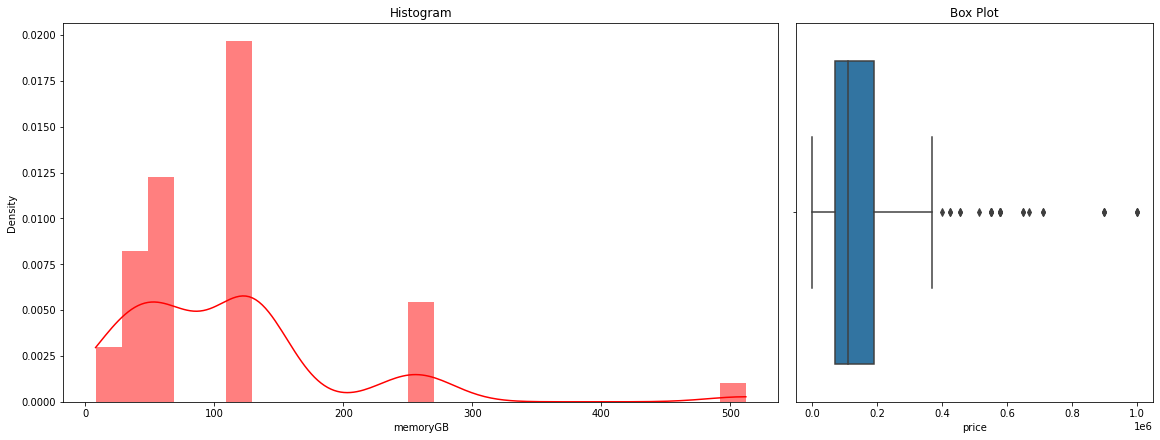

In [106]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')

sns.histplot(x = data.loc[:,'memoryGB'], ax = ax1, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')

sns.boxplot(x = data.loc[:,'price'],  orient='v', ax = ax3)
plt.show()

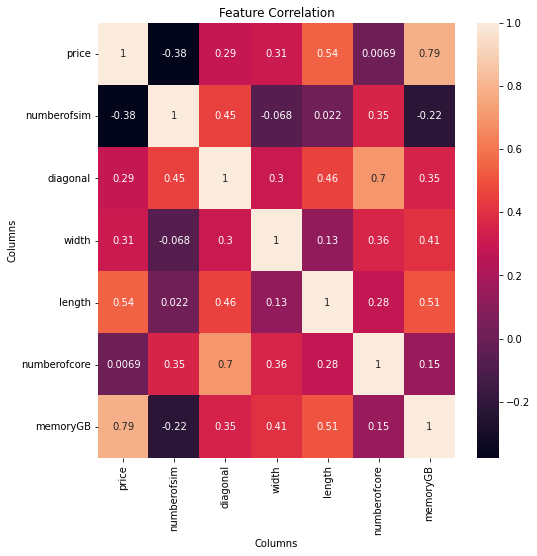

In [107]:

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(data.corr(), annot=True, ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

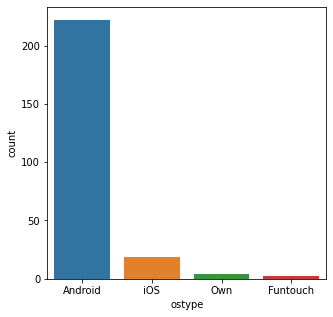

In [108]:
categorical_variables = data.select_dtypes(include=['object'])
plt.figure(figsize=(5,5))
sns.countplot(data = categorical_variables, x='ostype', order=categorical_variables.ostype.value_counts().index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

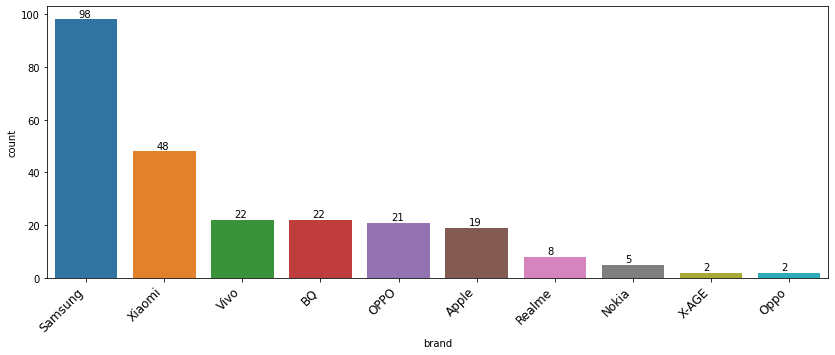

In [109]:
plt.figure(figsize=(14,5))
ax2 = sns.countplot(data = categorical_variables, x='brand', order=categorical_variables.brand.value_counts().index)

for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1))

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

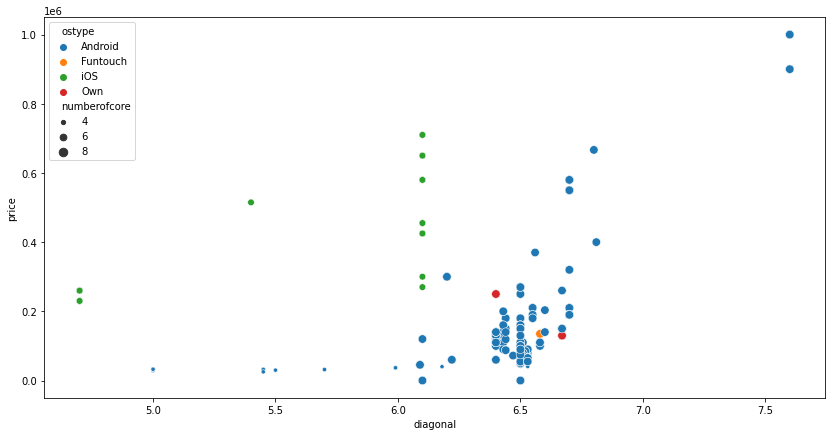

In [110]:
fig, ax = plt.subplots(figsize = (14,7))  

sns.scatterplot(data=data, x="diagonal", y="price", hue="ostype", size='numberofcore')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97584d2c10>,
      dtype=object)

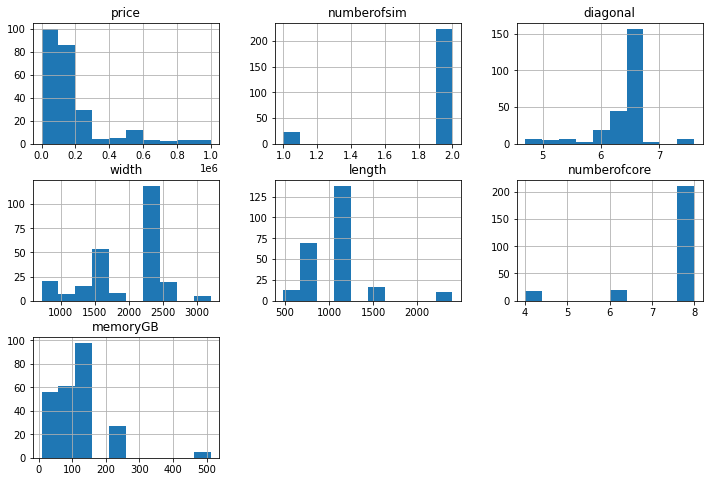

In [111]:
numeric_variables = data.select_dtypes(exclude=['object'])
numeric_variables.hist(figsize=(12,8), bins=10)

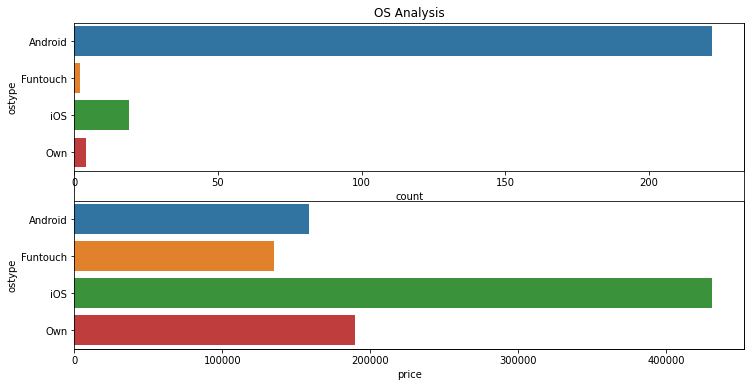

In [112]:
fig = plt.figure(figsize=(12, 6))
plt.title('OS Analysis')
plt.yticks([],[])
plt.xticks([],[])
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


sns.countplot(data= data, y= 'ostype', ax= ax1)
sns.barplot(data= data, y= 'ostype', x= 'price', ax= ax2, ci= None)

plt.show()

##Predict

In [113]:
data_final = pd.concat([data,pd.get_dummies(data['ostype'], prefix='ostype')], axis=1)
#dropping the redundant region column
data_final.drop(['ostype'],axis=1,inplace=True)
data_final.drop(['os'],axis=1,inplace=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              247 non-null    object 
 1   brand             247 non-null    object 
 2   price             247 non-null    int64  
 3   numberofsim       247 non-null    int64  
 4   diagonal          247 non-null    float64
 5   width             247 non-null    int64  
 6   length            247 non-null    int64  
 7   screentechnology  247 non-null    object 
 8   numberofcore      247 non-null    int64  
 9   memoryGB          247 non-null    int64  
 10  sensortype        247 non-null    object 
 11  ostype_Android    247 non-null    uint8  
 12  ostype_Funtouch   247 non-null    uint8  
 13  ostype_Own        247 non-null    uint8  
 14  ostype_iOS        247 non-null    uint8  
dtypes: float64(1), int64(6), object(4), uint8(4)
memory usage: 22.3+ KB


In [114]:
data_final.drop(['sensortype'],axis=1,inplace=True)
data_final.drop(['screentechnology'],axis=1,inplace=True)
data_final = pd.concat([data_final,pd.get_dummies(data_final['brand'], prefix='brand')], axis=1)
#dropping the redundant region column
data_final.drop(['brand'],axis=1,inplace=True)
data_final.drop(['name'],axis=1,inplace=True)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            247 non-null    int64  
 1   numberofsim      247 non-null    int64  
 2   diagonal         247 non-null    float64
 3   width            247 non-null    int64  
 4   length           247 non-null    int64  
 5   numberofcore     247 non-null    int64  
 6   memoryGB         247 non-null    int64  
 7   ostype_Android   247 non-null    uint8  
 8   ostype_Funtouch  247 non-null    uint8  
 9   ostype_Own       247 non-null    uint8  
 10  ostype_iOS       247 non-null    uint8  
 11  brand_Apple      247 non-null    uint8  
 12  brand_BQ         247 non-null    uint8  
 13  brand_Nokia      247 non-null    uint8  
 14  brand_OPPO       247 non-null    uint8  
 15  brand_Oppo       247 non-null    uint8  
 16  brand_Realme     247 non-null    uint8  
 17  brand_Samsung   

In [115]:
y = data_final['price']
X = data_final.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)
print('MAE:', mean_absolute_error(y_test, lm_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm_pred)))
print('R2_Score: ', r2_score(y_test, lm_pred))

MAE: 82875.82581025835
RMSE: 111853.22747545254
R2_Score:  0.4416612692533469


In [117]:
rf = RandomForestRegressor(random_state=101, n_estimators=200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2_Score: ', r2_score(y_test, rf_pred))

MAE: 19638.37807023045
RMSE: 32209.164984317555
R2_Score:  0.9537022754303711


In [118]:
X_Iphone12_64 = X.iloc[192:193]
X_Iphone12_64.head()


,numberofsim,diagonal,width,length,numberofcore,memoryGB,ostype_Android,ostype_Funtouch,ostype_Own,ostype_iOS,brand_Apple,brand_BQ,brand_Nokia,brand_OPPO,brand_Oppo,brand_Realme,brand_Samsung,brand_Vivo,brand_X-AGE,brand_Xiaomi
192,1,6.1,2532,1170,6,64,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [119]:
lm_pred = lm.predict(X_Iphone12_64)
rf_pred = rf.predict(X_Iphone12_64)

print('Linear Regression: ', lm_pred)
print('Random Forest: ', rf_pred)
print('Real price is 424 000 Tenge')


Linear Regression:  [446035.44525512]
Random Forest:  [430806.46666667]
Real price is 424 000 Tenge
